# Divergencia de Kullback Leibler

In [1]:
from math import log10
def d_KL_discrete(p, q):
    return sum(p[k] * log10(p[k] / q[k]) for k in range(len(p)))

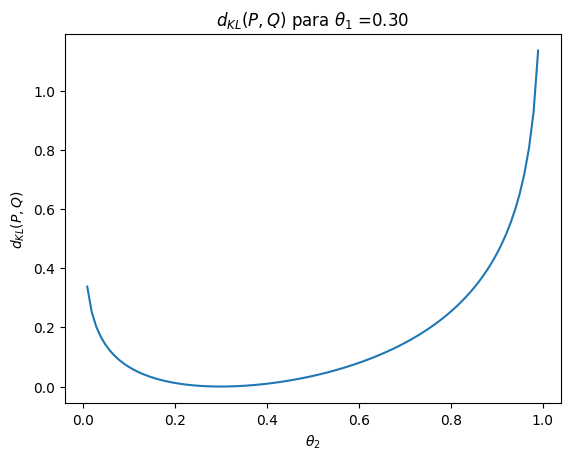

In [2]:
import numpy as np
import matplotlib.pyplot as plt

theta1 = 0.3
theta2 = np.linspace(0.01, 0.99, 100)

P = np.array([theta1, 1 - theta1])
Q = np.array([theta2, 1 - theta2])

dkl = np.array([d_KL_discrete(P, [theta, 1-theta]) for theta in theta2])

plt.plot(theta2, dkl)
plt.xlabel(r'$\theta_2$')
plt.ylabel(r'$d_{KL}(P,Q)$')
plt.title(r'$d_{KL}(P,Q)$ para $\theta_1$ ='+'{:.2f}'.format(theta1))
plt.show()

Calculando las esperanzas respecto a P:
$$\begin{align*}
f_P(x)&=\frac{1}{\sqrt{2\pi\sigma^2}}exp\left(-\frac{(x-\mu_1)^2}{2\sigma^2}\right) \\
logf_P(x)&=-\frac{1}{2}\left(log\left(2\pi\sigma^2\right)+1\right)
\end{align*}$$

$$\begin{align*}
f_Q(x)&=\frac{1}{\sqrt{2\pi}}exp\left(-\frac{(x-\mu_2)^2}{2}\right) \\
logf_Q(x)&=-\frac{1}{2}\left[log\left(2\pi\right)+\sigma^2+(\mu_1-\mu_2)^2\right]
\end{align*}$$

$$ d_{KL}(P,Q)=\frac{1}{2}\left[\sigma^2+(\mu_1-\mu_2)^2-1-log\sigma^2\right] $$


In [3]:
def d_KL_continuous(mu1, var, mu2):
    return 0.5 * (var+(mu1-mu2)**2 - 1 - log10(var))

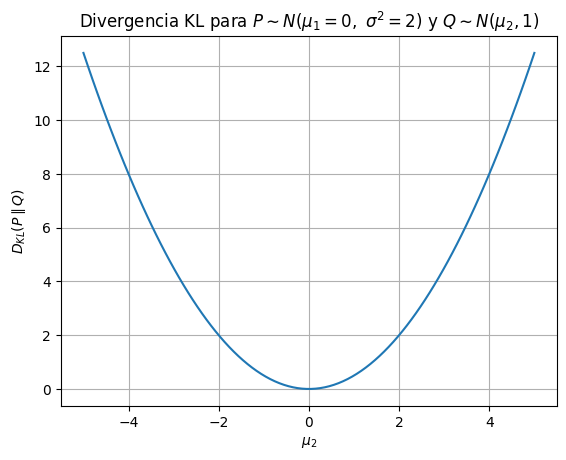

In [4]:
mu1 = 0
var = 1

mu2 = np.linspace(-5, 5, 100)
dkl_continuous = np.array([d_KL_continuous(mu1, var, mu) for mu in mu2])

plt.plot(mu2, dkl_continuous)
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$D_{KL}(P \parallel Q)$')
plt.title(r'Divergencia KL para $P\sim N(\mu_1=0,\ \sigma^2=2)$ y $Q\sim N(\mu_2,1)$')
plt.grid(True)
plt.show()

# MNIST

In [5]:
import pandas as pd

In [6]:
mnist = pd.read_csv('../MNIST/mnist_train.csv', header=None)
mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist_1_7 = mnist[mnist[0].isin([1,7])]
labels = mnist_1_7[0]
mnist_1_7.drop(columns=0, inplace=True)

/tmp/ipykernel_18005/3373377706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnist_1_7.drop(columns=0, inplace=True)


In [8]:
mnist_1_7.shape

(13007, 784)

In [9]:
import matplotlib.pyplot as plt

def plot_embedding(X_embedded, labels, title):
    plt.figure(figsize=(6,6))
    plt.scatter(X_embedded[:,0], X_embedded[:,1], c=labels, cmap='coolwarm', alpha=0.6)
    plt.title(title)
    plt.colorbar()
    plt.show()

In [10]:
n_low = 5
n_high = 30

## ISOMAP

In [11]:
from sklearn.manifold import Isomap

In [12]:
isomap_low = Isomap(n_neighbors=n_low, n_components=2)
X_isomap_low = isomap_low.fit_transform(mnist_1_7)

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [13]:
isomap_high = Isomap(n_neighbors=n_high, n_components=2)
X_isomap_high = isomap_high.fit_transform(mnist_1_7)

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Al graficar los resultados para un numero de vecinos bajo y uno alto, se observa que la estructura de los clusters cambia visiblemente; esto se debe a que un bajo numero de vecinos enfatiza las relaciones locales (entre observaciones cercanas), mientras que uno alto tiene en cuenta la estructura global de los datos, aunque distorsionando las estructuras mas localizadas.

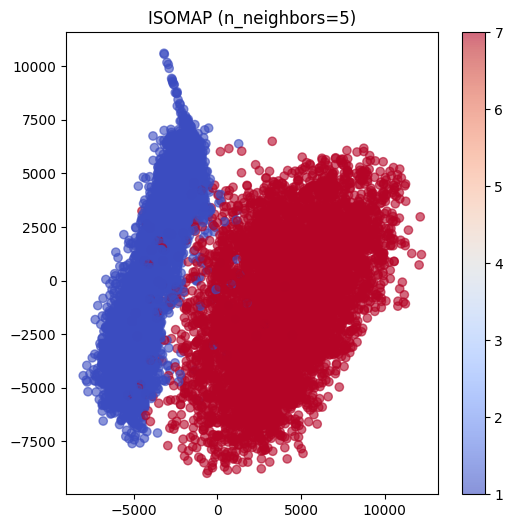

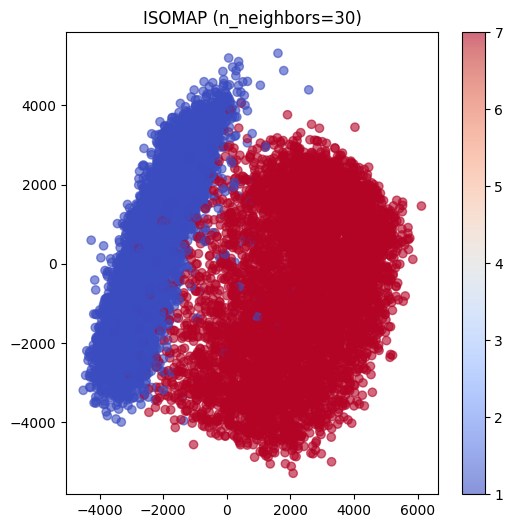

In [14]:
plot_embedding(X_isomap_low, labels, f"ISOMAP (n_neighbors={n_low})")
plot_embedding(X_isomap_high, labels, f"ISOMAP (n_neighbors={n_high})")

## LLE

In [15]:
from sklearn.manifold import LocallyLinearEmbedding

lle_low = LocallyLinearEmbedding(n_neighbors=n_low, n_components=2)
X_lle_low = lle_low.fit_transform(mnist_1_7)

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [16]:
lle_high = LocallyLinearEmbedding(n_neighbors=n_high, n_components=2)
X_lle_high = lle_high.fit_transform(mnist_1_7)

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Algo similar al caso anterior ocurre aqui, siendo que con numeros bajos de vecinos los grupos aparecen mas disconexos, mientras que con alto numero de vecinos se pierden en parte las estructuras locales, observando una gran diferencia entre ambos casos.

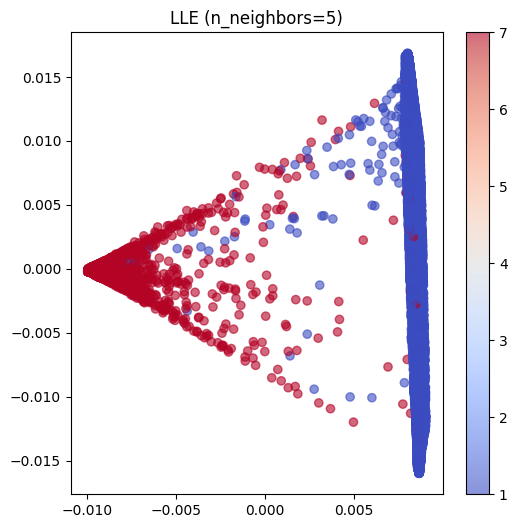

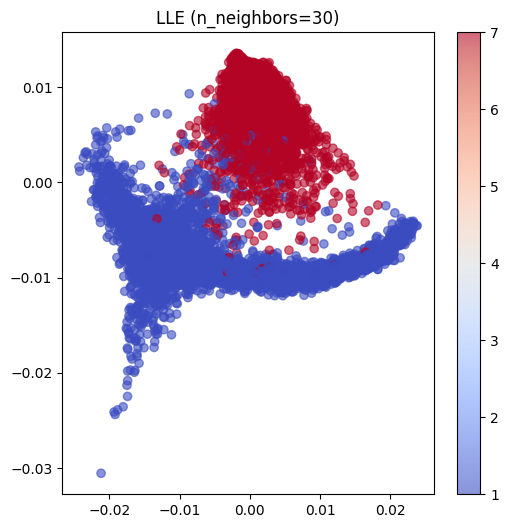

In [17]:
plot_embedding(X_lle_low, labels, f"LLE (n_neighbors={n_low})")
plot_embedding(X_lle_high, labels, f"LLE (n_neighbors={n_high})")

## t-SNE

In [18]:
from sklearn.manifold import TSNE

In [19]:
tsne_low = TSNE(n_components=2, perplexity=n_low, random_state=42)
X_tsne_low = tsne_low.fit_transform(mnist_1_7)

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [20]:
tsne_high = TSNE(n_components=2, perplexity=n_high, random_state=42)
X_tsne_high = tsne_high.fit_transform(mnist_1_7)

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Como en el numero de vecinos en los casos anteriores, los mismos efectos se repiten aqui para la perplejidad baja y alta, observando en este caso una separacion mas clara entre los grupos en el ultimo caso.

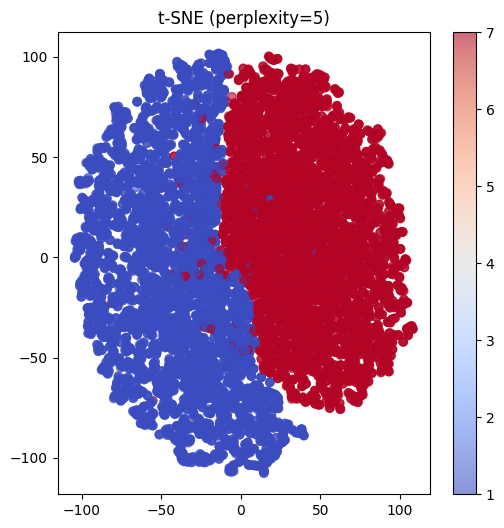

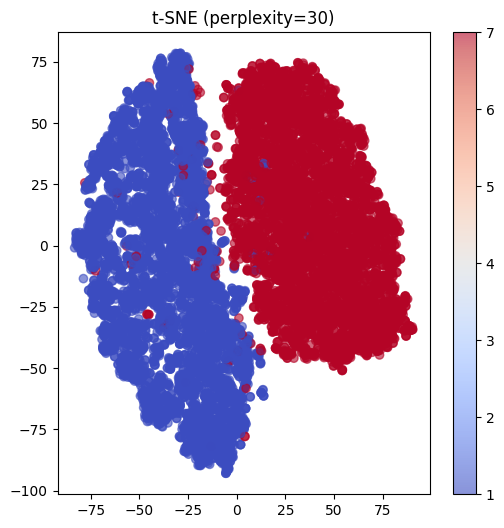

In [22]:
plot_embedding(X_tsne_low, labels, f"t-SNE (perplexity={n_low})")
plot_embedding(X_tsne_high, labels, f"t-SNE (perplexity={n_high})")
